<a href="https://colab.research.google.com/github/dharanisatwika/Air-Canvas-project/blob/master/SKIN_CANCER_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from pylab import imread,subplot,imshow,show
import cv2
import os

In [ ]:
!wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/CNN_model_dataset.zip"
!unzip -qo CNN_model_dataset.zip 
!rm CNN_model_dataset.zip

--2022-12-28 15:44:07--  https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/CNN_model_dataset.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.160.11
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.160.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170317173 (162M) [application/x-zip-compressed]
Saving to: ‘CNN_model_dataset.zip’

CNN_model_dataset.z 100%[===================>] 162.43M  12.5MB/s    in 15s     

2022-12-28 15:44:23 (10.9 MB/s) - ‘CNN_model_dataset.zip’ saved [170317173/170317173]



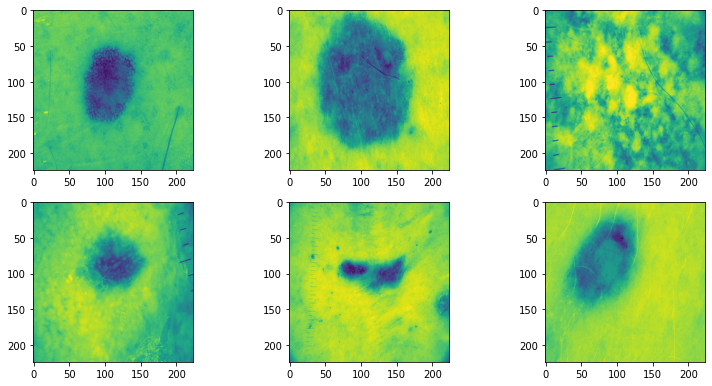

In [ ]:
fig = plt.figure(figsize=(13, 10))

path = r'data/train/benign/100.jpg'
Image1 = cv2.imread(path,0)

path_1 = r'data/train/benign/1021.jpg'
Image2 = cv2.imread(path_1,0)

path_2 = r'data/train/malignant/19.jpg'
Image3 = cv2.imread(path_2,0)

path_3 = r'data/train/malignant/55.jpg'
Image4 = cv2.imread(path_3,0)

path_4 = r'data/test/benign/105.jpg'
Image5 = cv2.imread(path_4,0)

path_5 = r'data/test/benign/259.jpg'
Image6 = cv2.imread(path_5,0)

fig.add_subplot(3,3,1)
plt.imshow(Image1)
fig.add_subplot(3,3,2)
plt.imshow(Image2)
fig.add_subplot(3,3,3)
plt.imshow(Image3)
fig.add_subplot(3,3,4)
plt.imshow(Image4)
fig.add_subplot(3,3,5)
plt.imshow(Image5)
fig.add_subplot(3,3,6)
plt.imshow(Image6)

In [ ]:
train = ImageDataGenerator(rescale=1./255)
test =  ImageDataGenerator(rescale=1./255)
val =  ImageDataGenerator(rescale=1./255)

In [ ]:
train='data/train/'

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.25,
    image_size=(224,224),
    batch_size=35,
    subset='training',
    seed=50 )

Found 2637 files belonging to 2 classes.
Using 1978 files for training.


In [ ]:
val='data/train/'

In [ ]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val,
    validation_split=0.25,
    image_size=(224,224),
    batch_size=35,
    subset='validation',
    seed=50
    )

Found 2637 files belonging to 2 classes.
Using 659 files for validation.


In [ ]:
test='data/test/'

In [ ]:
test_data=tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(224,224),
    batch_size=35,
    seed=50
    )

Found 660 files belonging to 2 classes.


In [ ]:
class_names = ['Benign', 'Malignant']

In [ ]:
train_data.class_names = class_names
val_data.class_names = class_names

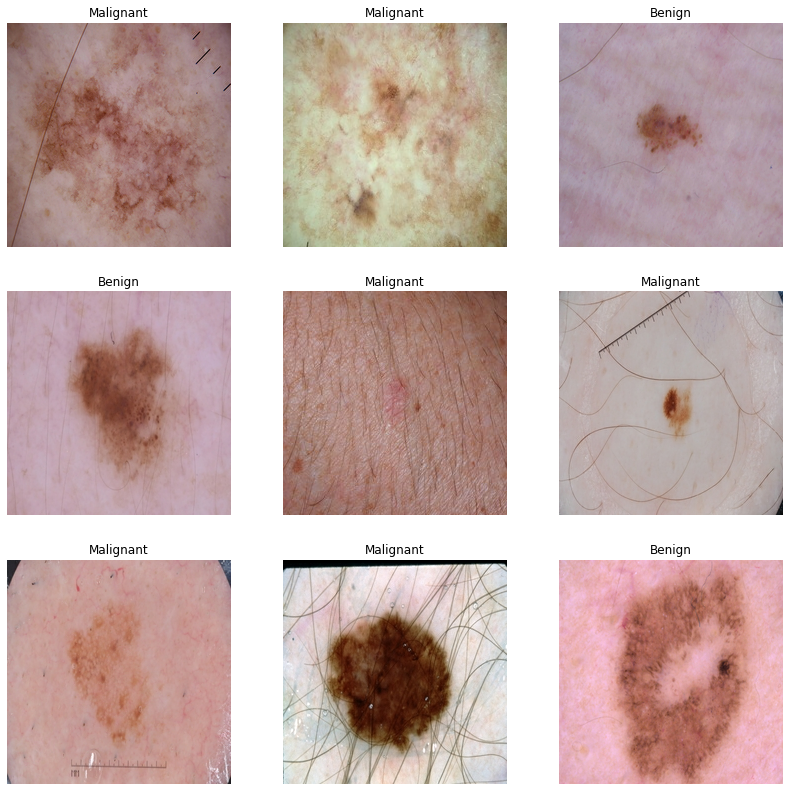

In [ ]:
plt.figure(figsize=(14, 14))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()

In [ ]:
#CNN Layer
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 16)       0

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
samples=2637
batch_size=35
new_values= samples//batch_size
value=print(new_values)
history = model.fit(
          train_data,
          steps_per_epoch = value,
          epochs=10,
          validation_data=val_data,
                             )

75
Epoch 1/10
57/57 [==============================] - 133s 2s/step - loss: 0.6716 - accuracy: 0.6330 - val_loss: 0.6290 - val_accuracy: 0.6935
Epoch 2/10
57/57 [==============================] - 131s 2s/step - loss: 0.5973 - accuracy: 0.6790 - val_loss: 0.5483 - val_accuracy: 0.7344
Epoch 3/10
57/57 [==============================] - 127s 2s/step - loss: 0.5400 - accuracy: 0.7128 - val_loss: 0.4717 - val_accuracy: 0.7678
Epoch 4/10
57/57 [==============================] - 128s 2s/step - loss: 0.4558 - accuracy: 0.7755 - val_loss: 0.5103 - val_accuracy: 0.7557
Epoch 5/10
57/57 [==============================] - 127s 2s/step - loss: 0.4616 - accuracy: 0.7679 - val_loss: 0.5034 - val_accuracy: 0.7587
Epoch 6/10
57/57 [==============================] - 127s 2s/step - loss: 0.4625 - accuracy: 0.7710 - val_loss: 0.4746 - val_accuracy: 0.7769
Epoch 7/10
57/57 [==============================] - 128s 2s/step - loss: 0.4250 - accuracy: 0.7887 - val_loss: 0.4449 - val_accuracy: 0.7678
Epoch 8/10

In [20]:
model.evaluate(val_data)

19/19 [==============================] - 11s 552ms/step - loss: 0.3896 - accuracy: 0.8149


[0.38959768414497375, 0.8148710131645203]

In [21]:
model.evaluate(test_data)

19/19 [==============================] - 12s 603ms/step - loss: 0.3794 - accuracy: 0.8303


[0.37937864661216736, 0.8303030133247375]

In [22]:
model.save("cnn_model_skin1.h5")

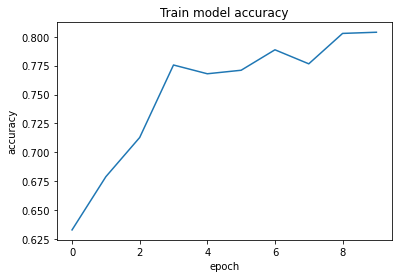

In [23]:
plt.plot(history.history['accuracy'])
plt.title('Train model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

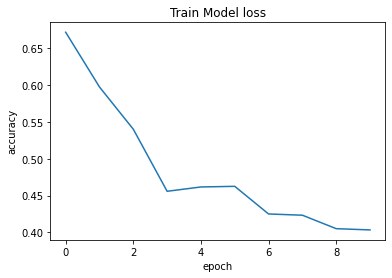

In [24]:
plt.plot(history.history['loss'])
plt.title('Train Model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

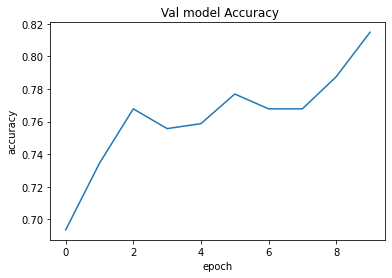

In [25]:
plt.plot(history.history['val_accuracy'])
plt.title(' Val model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

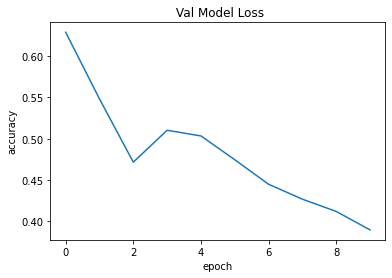

In [26]:
plt.plot(history.history['val_loss'])
plt.title(' Val Model Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

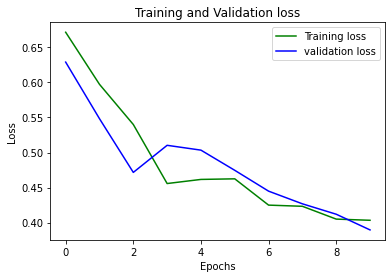

In [27]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

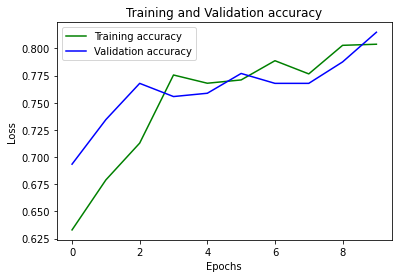

In [28]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
from tensorflow.keras.models import load_model       
prediction=tf.keras.models.load_model("cnn_model_skin1.h5")

In [30]:
import glob
import cv2


In [31]:
path = glob.glob("dummy/*.jpg")
print(path)

['dummy/95.jpg', 'dummy/84.jpg', 'dummy/30.jpg', 'dummy/37.jpg', 'dummy/5.jpg']


In [32]:
list=[]

In [33]:
for file in path:
    photo=cv2.imread(file)
    list.append(photo)

In [34]:
from tensorflow.keras.preprocessing import image

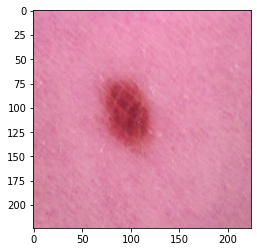

1/1 [==============================] - 0s 207ms/step
---------------Benign---------------





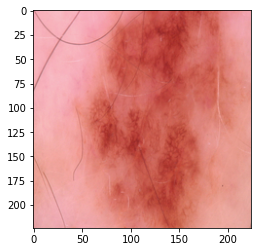

1/1 [==============================] - 0s 43ms/step
---------------Benign---------------





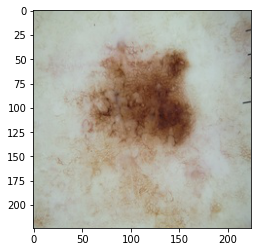

1/1 [==============================] - 0s 35ms/step
--------------Malignant-------------





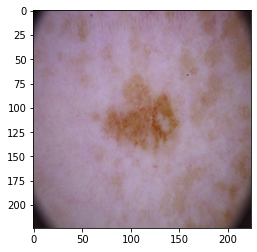

1/1 [==============================] - 0s 35ms/step
---------------Benign---------------





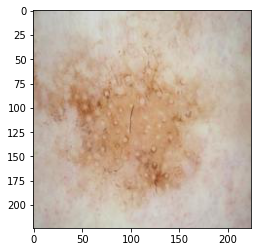

1/1 [==============================] - 0s 36ms/step
--------------Malignant-------------





In [35]:
dir_path="dummy/"

for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+ i)
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    p=np.argmax(prediction.predict(x))
    if p==0:
        print("---------------Benign---------------\n\n\n")
    elif p==1:
        print("--------------Malignant-------------\n\n\n")

In [36]:
class_names={0:"Benign", 1:"Malignant"}

In [37]:
for images, labels in test_data.take(1):
    for i in range(6):
        print("True_class:",val_data.class_names[labels[i]])
        x = image.img_to_array(images[i])
        x = np.expand_dims(x, axis=0)
        p=np.argmax(model.predict(x))
        if p==0:
            print("Predicted Image: Benign")
        else:
            print("Predicted Image: Malignant")
        
        print("Predicted class:",p)
        print(" ")

True_class: Malignant
1/1 [==============================] - 0s 147ms/step
Predicted Image: Malignant
Predicted class: 1
 
True_class: Malignant
1/1 [==============================] - 0s 35ms/step
Predicted Image: Malignant
Predicted class: 1
 
True_class: Benign
1/1 [==============================] - 0s 37ms/step
Predicted Image: Benign
Predicted class: 0
 
True_class: Malignant
1/1 [==============================] - 0s 37ms/step
Predicted Image: Malignant
Predicted class: 1
 
True_class: Benign
1/1 [==============================] - 0s 39ms/step
Predicted Image: Benign
Predicted class: 0
 
True_class: Malignant
1/1 [==============================] - 0s 35ms/step
Predicted Image: Malignant
Predicted class: 1
 


In [38]:
!deepCC "cnn_model_skin1.h5"

/bin/bash: deepCC: command not found
